# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

# Use Floyd's cifar-10 dataset if present
floyd_cifar10_location = '/input/cifar-10/python.tar.gz'
if isfile(floyd_cifar10_location):
    tar_gz_path = floyd_cifar10_location
else:
    tar_gz_path = 'cifar-10-python.tar.gz'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(tar_gz_path):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            tar_gz_path,
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open(tar_gz_path) as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.

Ask yourself "What are all possible labels?", "What is the range of values for the image data?", "Are the labels in order or random?".  Answers to questions like these will help you preprocess the data and end up with better predictions.


Stats of batch 1:
Samples: 10000
Label Counts: {0: 1005, 1: 974, 2: 1032, 3: 1016, 4: 999, 5: 937, 6: 1030, 7: 1001, 8: 1025, 9: 981}
First 20 Labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6]

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile


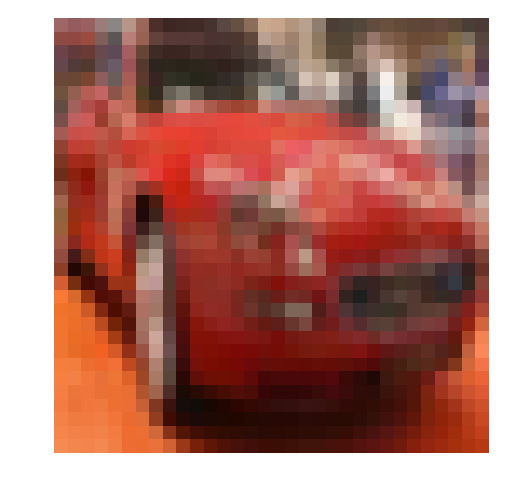

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 1
sample_id = 5
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [3]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function
    return x * 1.0/255


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_normalize(normalize)

Tests Passed


### One-hot encode
Just like the previous code cell, you'll be implementing a function for preprocessing.  This time, you'll implement the `one_hot_encode` function. The input, `x`, are a list of labels.  Implement the function to return the list of labels as One-Hot encoded Numpy array.  The possible values for labels are 0 to 9. The one-hot encoding function should return the same encoding for each value between each call to `one_hot_encode`.  Make sure to save the map of encodings outside the function.

Hint: Don't reinvent the wheel.

In [4]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(range(10))

def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    return lb.transform(x)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_one_hot_encode(one_hot_encode)

Tests Passed


### Randomize Data
As you saw from exploring the data above, the order of the samples are randomized.  It doesn't hurt to randomize it again, but you don't need to for this dataset.

## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

# Check Point
This is your first checkpoint.  If you ever decide to come back to this notebook or have to restart the notebook, you can start from here.  The preprocessed data has been saved to disk.

In [6]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
For the neural network, you'll build each layer into a function.  Most of the code you've seen has been outside of functions. To test your code more thoroughly, we require that you put each layer in a function.  This allows us to give you better feedback and test for simple mistakes using our unittests before you submit your project.

>**Note:** If you're finding it hard to dedicate enough time for this course each week, we've provided a small shortcut to this part of the project. In the next couple of problems, you'll have the option to use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages to build each layer, except the layers you build in the "Convolutional and Max Pooling Layer" section.  TF Layers is similar to Keras's and TFLearn's abstraction to layers, so it's easy to pickup.

>However, if you would like to get the most out of this course, try to solve all the problems _without_ using anything from the TF Layers packages. You **can** still use classes from other packages that happen to have the same name as ones you find in TF Layers! For example, instead of using the TF Layers version of the `conv2d` class, [tf.layers.conv2d](https://www.tensorflow.org/api_docs/python/tf/layers/conv2d), you would want to use the TF Neural Network version of `conv2d`, [tf.nn.conv2d](https://www.tensorflow.org/api_docs/python/tf/nn/conv2d). 

Let's begin!

### Input
The neural network needs to read the image data, one-hot encoded labels, and dropout keep probability. Implement the following functions
* Implement `neural_net_image_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `image_shape` with batch size set to `None`.
 * Name the TensorFlow placeholder "x" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_label_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)
 * Set the shape using `n_classes` with batch size set to `None`.
 * Name the TensorFlow placeholder "y" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).
* Implement `neural_net_keep_prob_input`
 * Return a [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder) for dropout keep probability.
 * Name the TensorFlow placeholder "keep_prob" using the TensorFlow `name` parameter in the [TF Placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder).

These names will be used at the end of the project to load your saved model.

Note: `None` for shapes in TensorFlow allow for a dynamic size.

In [7]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function    
    return tf.placeholder(tf.float32, name='x', shape=[None, *image_shape])

def neural_net_image_augment(images):
    images = tf.map_fn(lambda img: tf.image.random_flip_left_right(img), images)
    images = tf.map_fn(lambda img: tf.image.random_brightness(img, max_delta=0.2), images)
    images = tf.map_fn(lambda img: tf.image.random_saturation(img, lower=0.8, upper=1.2), images)
    images = tf.map_fn(lambda img: tf.image.random_hue(img, max_delta=0.2), images)
    images = tf.map_fn(lambda img: tf.image.random_contrast(img, lower=0.8, upper=1.2), images)
    return images

def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.uint8, name='y', shape=[None, n_classes])


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32, name='keep_prob')


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer
Convolution layers have a lot of success with images. For this code cell, you should implement the function `conv2d_maxpool` to apply convolution then max pooling:
* Create the weight and bias using `conv_ksize`, `conv_num_outputs` and the shape of `x_tensor`.
* Apply a convolution to `x_tensor` using weight and `conv_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.
* Add bias
* Add a nonlinear activation to the convolution.
* Apply Max Pooling using `pool_ksize` and `pool_strides`.
 * We recommend you use same padding, but you're welcome to use any padding.

**Note:** You **can't** use [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) for **this** layer, but you can still use TensorFlow's [Neural Network](https://www.tensorflow.org/api_docs/python/tf/nn) package. You may still use the shortcut option for all the **other** layers.

In [8]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    weight = tf.Variable(tf.truncated_normal([*conv_ksize, x_tensor.get_shape().as_list()[3], conv_num_outputs], stddev=0.1))    
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1, *conv_strides, 1], padding='SAME')
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = tf.nn.relu(conv_layer)
    
    return tf.nn.max_pool(conv_layer, ksize=[1, *pool_ksize, 1], strides=[1, *pool_strides, 1], padding='SAME') 


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


In [9]:
def batch_norm(x, n_out, phase_train):
    """
    Batch normalization on convolutional maps.
    Ref.: http://stackoverflow.com/questions/33949786/how-could-i-use-batch-normalization-in-tensorflow
    Args:
        x:           Tensor, 4D BHWD input maps
        n_out:       integer, depth of input maps
        phase_train: boolean tf.Varialbe, true indicates training phase
        scope:       string, variable scope
    Return:
        normed:      batch-normalized maps
    """
    with tf.variable_scope('bn'):
        beta = tf.Variable(tf.constant(0.0, shape=[n_out]),
                                     name='beta', trainable=True)
        gamma = tf.Variable(tf.constant(1.0, shape=[n_out]),
                                      name='gamma', trainable=True)
        batch_mean, batch_var = tf.nn.moments(x, [0,1,2], name='moments')
        ema = tf.train.ExponentialMovingAverage(decay=0.5)

        def mean_var_with_update():
            ema_apply_op = ema.apply([batch_mean, batch_var])
            with tf.control_dependencies([ema_apply_op]):
                return tf.identity(batch_mean), tf.identity(batch_var)

        mean, var = tf.cond(phase_train,
                            mean_var_with_update,
                            lambda: (ema.average(batch_mean), ema.average(batch_var)))
        normed = tf.nn.batch_normalization(x, mean, var, beta, gamma, 1e-3)
    return normed

In [10]:
def conv2d_bn_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides, phase):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function    
    weight = tf.Variable(tf.truncated_normal([*conv_ksize, x_tensor.get_shape().as_list()[3], conv_num_outputs], stddev=0.1))    
    bias = tf.Variable(tf.zeros(conv_num_outputs))
    
    conv_layer = tf.nn.conv2d(x_tensor, weight, strides=[1, *conv_strides, 1], padding='SAME')
    conv_layer = tf.nn.bias_add(conv_layer, bias)
    conv_layer = batch_norm(conv_layer, conv_num_outputs, phase)
    conv_layer = tf.nn.relu(conv_layer)
    
    return tf.nn.max_pool(conv_layer, ksize=[1, *pool_ksize, 1], strides=[1, *pool_strides, 1], padding='SAME') 



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer
Implement the `flatten` function to change the dimension of `x_tensor` from a 4-D tensor to a 2-D tensor.  The output should be the shape (*Batch Size*, *Flattened Image Size*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [11]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function    
    tensorShape = x_tensor.get_shape().as_list()
    return tf.reshape(x_tensor, [-1, tensorShape[1]*tensorShape[2]*tensorShape[3]])


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer
Implement the `fully_conn` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

In [12]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    assert len(x_tensor.get_shape().as_list()) == 2, "FullyConnectedLayer: Invalid input shape"
    
    weights = tf.Variable( tf.truncated_normal( [ x_tensor.get_shape().as_list()[-1], num_outputs ], stddev=0.1) )
    biases = tf.Variable( tf.zeros( [num_outputs] ))
    return tf.nn.relu(tf.add(tf.matmul(x_tensor, weights), biases))


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer
Implement the `output` function to apply a fully connected layer to `x_tensor` with the shape (*Batch Size*, *num_outputs*). Shortcut option: you can use classes from the [TensorFlow Layers](https://www.tensorflow.org/api_docs/python/tf/layers) or [TensorFlow Layers (contrib)](https://www.tensorflow.org/api_guides/python/contrib.layers) packages for this layer. For more of a challenge, only use other TensorFlow packages.

**Note:** Activation, softmax, or cross entropy should **not** be applied to this.

In [13]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    assert len(x_tensor.get_shape().as_list()) == 2, "Output: Invalid input shape"
    
    weights = tf.Variable( tf.truncated_normal( [ x_tensor.get_shape().as_list()[-1], num_outputs ], stddev=0.1) )
    biases = tf.Variable( tf.zeros( [num_outputs] ))
    return tf.add(tf.matmul(x_tensor, weights), biases)



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_output(output)

Tests Passed


### Create Convolutional Model
Implement the function `conv_net` to create a convolutional neural network model. The function takes in a batch of images, `x`, and outputs logits.  Use the layers you created above to create this model:

* Apply 1, 2, or 3 Convolution and Max Pool layers
* Apply a Flatten Layer
* Apply 1, 2, or 3 Fully Connected Layers
* Apply an Output Layer
* Return the output
* Apply [TensorFlow's Dropout](https://www.tensorflow.org/api_docs/python/tf/nn/dropout) to one or more layers in the model using `keep_prob`. 

In [14]:
useBN = True
use_data_augmentation = True

def conv_net(x, keep_prob, training_phase=True):
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """
    if useBN:
        x = conv2d_bn_maxpool(x, 32, conv_ksize=[3,3], conv_strides=[1,1], pool_ksize=[2,2], 
                              pool_strides=[2,2], phase=training_phase)
        x = tf.nn.dropout(x, keep_prob)
        x = conv2d_bn_maxpool(x, 64, conv_ksize=[3,3], conv_strides=[1,1], pool_ksize=[2,2], 
                              pool_strides=[2,2], phase=training_phase)
        x = tf.nn.dropout(x, keep_prob)
        x = conv2d_bn_maxpool(x, 128, conv_ksize=[3,3], conv_strides=[1,1], pool_ksize=[2,2], 
                              pool_strides=[2,2], phase=training_phase)
        x = tf.nn.dropout(x, keep_prob)

        x = flatten(x)
        x = fully_conn(x, 512)
        x = tf.nn.dropout(x, keep_prob)
        x = fully_conn(x, 256)
        x = tf.nn.dropout(x, keep_prob)
        x = fully_conn(x, 128)
        x = tf.nn.dropout(x, keep_prob)
        out = output(x, 10)
    else:
        x = conv2d_maxpool(x, 32, conv_ksize=[3,3], conv_strides=[1,1], pool_ksize=[2,2], pool_strides=[2,2])
        x = tf.nn.dropout(x, keep_prob)
        x = conv2d_maxpool(x, 64, conv_ksize=[3,3], conv_strides=[1,1], pool_ksize=[2,2], pool_strides=[2,2])
        x = tf.nn.dropout(x, keep_prob)
        x = conv2d_maxpool(x, 128, conv_ksize=[3,3], conv_strides=[1,1], pool_ksize=[2,2], pool_strides=[2,2])
        x = tf.nn.dropout(x, keep_prob)

        x = flatten(x)
        x = fully_conn(x, 512)
        x = tf.nn.dropout(x, keep_prob)
        x = fully_conn(x, 256)
        x = tf.nn.dropout(x, keep_prob)
        x = fully_conn(x, 128)
        x = tf.nn.dropout(x, keep_prob)
        out = output(x, 10)
    # TODO: return output
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()
augment_data = tf.constant(use_data_augmentation, dtype=tf.bool)
phase_train = tf.placeholder(tf.bool, name='phase_train')

# augment data only in training phase and if enabled
x = tf.cond(tf.logical_and(phase_train, augment_data), lambda: neural_net_image_augment(x), lambda: x)

# Model
logits = conv_net(x, keep_prob, phase_train)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
#update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
#with tf.control_dependencies(update_ops):
optimizer = tf.train.AdamOptimizer().minimize(cost)
#
# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

#tests.test_conv_net(conv_net)

## Train the Neural Network
### Single Optimization
Implement the function `train_neural_network` to do a single optimization.  The optimization should use `optimizer` to optimize in `session` with a `feed_dict` of the following:
* `x` for image input
* `y` for labels
* `keep_prob` for keep probability for dropout

This function will be called for each batch, so `tf.global_variables_initializer()` has already been called.

Note: Nothing needs to be returned. This function is only optimizing the neural network.

In [15]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch, training=True):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    session.run(optimizer, feed_dict={x: feature_batch, y: label_batch, keep_prob: keep_probability, phase_train:training})    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [16]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    # TODO: Implement Function+    
    valid_accuracy = session.run(accuracy, feed_dict={x: valid_features, y:  valid_labels  , keep_prob:1.0, phase_train:False})
    loss = session.run(cost, feed_dict={x: feature_batch, y:  label_batch , keep_prob:1.0, phase_train:False})
    print("Accuracy: ", valid_accuracy, " Loss: ", loss)
    

### Hyperparameters
Tune the following parameters:
* Set `epochs` to the number of iterations until the network stops learning or start overfitting
* Set `batch_size` to the highest number that your machine has memory for.  Most people set them to common sizes of memory:
 * 64
 * 128
 * 256
 * ...
* Set `keep_probability` to the probability of keeping a node using dropout

In [17]:
# TODO: Tune Parameters
epochs = 100
batch_size = 128
keep_probability = 0.7

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables    
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  Accuracy:  0.1698  Loss:  2.2334
Epoch  2, CIFAR-10 Batch 1:  Accuracy:  0.185  Loss:  2.11345
Epoch  3, CIFAR-10 Batch 1:  Accuracy:  0.2268  Loss:  2.06198
Epoch  4, CIFAR-10 Batch 1:  Accuracy:  0.2548  Loss:  2.00148
Epoch  5, CIFAR-10 Batch 1:  Accuracy:  0.2676  Loss:  1.94471
Epoch  6, CIFAR-10 Batch 1:  Accuracy:  0.3026  Loss:  1.89206
Epoch  7, CIFAR-10 Batch 1:  Accuracy:  0.3006  Loss:  1.98169
Epoch  8, CIFAR-10 Batch 1:  Accuracy:  0.33  Loss:  1.91168
Epoch  9, CIFAR-10 Batch 1:  Accuracy:  0.3732  Loss:  1.78847
Epoch 10, CIFAR-10 Batch 1:  Accuracy:  0.3804  Loss:  1.72394
Epoch 11, CIFAR-10 Batch 1:  Accuracy:  0.3974  Loss:  1.66958
Epoch 12, CIFAR-10 Batch 1:  Accuracy:  0.4192  Loss:  1.64397
Epoch 13, CIFAR-10 Batch 1:  Accuracy:  0.4274  Loss:  1.58448
Epoch 14, CIFAR-10 Batch 1:  Accuracy:  0.446  Loss:  1.58774
Epoch 15, CIFAR-10 Batch 1:  Accuracy:  0.4518  Loss:  1.53281
Epoch 16, CIFAR-1

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [19]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
if useBN:
    save_model_path = './image_classification'
else:
    save_model_path = './image_classification_nobn'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  Accuracy:  0.1776  Loss:  2.23643
Epoch  1, CIFAR-10 Batch 2:  Accuracy:  0.2004  Loss:  2.18188
Epoch  1, CIFAR-10 Batch 3:  Accuracy:  0.221  Loss:  1.90726
Epoch  1, CIFAR-10 Batch 4:  Accuracy:  0.2614  Loss:  1.94915
Epoch  1, CIFAR-10 Batch 5:  Accuracy:  0.2532  Loss:  1.99651
Epoch  2, CIFAR-10 Batch 1:  Accuracy:  0.2658  Loss:  2.05923
Epoch  2, CIFAR-10 Batch 2:  Accuracy:  0.2874  Loss:  1.91603
Epoch  2, CIFAR-10 Batch 3:  Accuracy:  0.327  Loss:  1.65423
Epoch  2, CIFAR-10 Batch 4:  Accuracy:  0.3042  Loss:  1.86516
Epoch  2, CIFAR-10 Batch 5:  Accuracy:  0.3382  Loss:  1.96638
Epoch  3, CIFAR-10 Batch 1:  Accuracy:  0.3918  Loss:  1.8187
Epoch  3, CIFAR-10 Batch 2:  Accuracy:  0.3878  Loss:  1.69074
Epoch  3, CIFAR-10 Batch 3:  Accuracy:  0.4078  Loss:  1.48157
Epoch  3, CIFAR-10 Batch 4:  Accuracy:  0.4112  Loss:  1.57243
Epoch  3, CIFAR-10 Batch 5:  Accuracy:  0.4104  Loss:  1.70506
Epoch  4, CIFAR-10 Batch 1:  Accuracy:  0.4594

Epoch 26, CIFAR-10 Batch 5:  Accuracy:  0.747  Loss:  0.510128
Epoch 27, CIFAR-10 Batch 1:  Accuracy:  0.76  Loss:  0.634776
Epoch 27, CIFAR-10 Batch 2:  Accuracy:  0.7262  Loss:  0.533973
Epoch 27, CIFAR-10 Batch 3:  Accuracy:  0.765  Loss:  0.343962
Epoch 27, CIFAR-10 Batch 4:  Accuracy:  0.7518  Loss:  0.357489
Epoch 27, CIFAR-10 Batch 5:  Accuracy:  0.7162  Loss:  0.546457
Epoch 28, CIFAR-10 Batch 1:  Accuracy:  0.7564  Loss:  0.583519
Epoch 28, CIFAR-10 Batch 2:  Accuracy:  0.749  Loss:  0.493334
Epoch 28, CIFAR-10 Batch 3:  Accuracy:  0.7558  Loss:  0.385425
Epoch 28, CIFAR-10 Batch 4:  Accuracy:  0.7696  Loss:  0.336106
Epoch 28, CIFAR-10 Batch 5:  Accuracy:  0.7304  Loss:  0.54085
Epoch 29, CIFAR-10 Batch 1:  Accuracy:  0.7654  Loss:  0.603938
Epoch 29, CIFAR-10 Batch 2:  Accuracy:  0.7392  Loss:  0.487077
Epoch 29, CIFAR-10 Batch 3:  Accuracy:  0.751  Loss:  0.396985
Epoch 29, CIFAR-10 Batch 4:  Accuracy:  0.7612  Loss:  0.331296
Epoch 29, CIFAR-10 Batch 5:  Accuracy:  0.7374 

Epoch 52, CIFAR-10 Batch 3:  Accuracy:  0.7858  Loss:  0.147344
Epoch 52, CIFAR-10 Batch 4:  Accuracy:  0.7988  Loss:  0.16581
Epoch 52, CIFAR-10 Batch 5:  Accuracy:  0.7932  Loss:  0.101313
Epoch 53, CIFAR-10 Batch 1:  Accuracy:  0.7986  Loss:  0.213578
Epoch 53, CIFAR-10 Batch 2:  Accuracy:  0.7968  Loss:  0.163241
Epoch 53, CIFAR-10 Batch 3:  Accuracy:  0.7936  Loss:  0.145027
Epoch 53, CIFAR-10 Batch 4:  Accuracy:  0.8  Loss:  0.140618
Epoch 53, CIFAR-10 Batch 5:  Accuracy:  0.802  Loss:  0.10835
Epoch 54, CIFAR-10 Batch 1:  Accuracy:  0.8094  Loss:  0.178016
Epoch 54, CIFAR-10 Batch 2:  Accuracy:  0.8026  Loss:  0.162347
Epoch 54, CIFAR-10 Batch 3:  Accuracy:  0.788  Loss:  0.1374
Epoch 54, CIFAR-10 Batch 4:  Accuracy:  0.801  Loss:  0.1312
Epoch 54, CIFAR-10 Batch 5:  Accuracy:  0.7918  Loss:  0.107077
Epoch 55, CIFAR-10 Batch 1:  Accuracy:  0.8084  Loss:  0.168222
Epoch 55, CIFAR-10 Batch 2:  Accuracy:  0.8084  Loss:  0.164993
Epoch 55, CIFAR-10 Batch 3:  Accuracy:  0.7938  Loss

Epoch 77, CIFAR-10 Batch 5:  Accuracy:  0.8188  Loss:  0.0312605
Epoch 78, CIFAR-10 Batch 1:  Accuracy:  0.8134  Loss:  0.0695278
Epoch 78, CIFAR-10 Batch 2:  Accuracy:  0.822  Loss:  0.0555203
Epoch 78, CIFAR-10 Batch 3:  Accuracy:  0.8236  Loss:  0.0300623
Epoch 78, CIFAR-10 Batch 4:  Accuracy:  0.826  Loss:  0.0387568
Epoch 78, CIFAR-10 Batch 5:  Accuracy:  0.8146  Loss:  0.028651
Epoch 79, CIFAR-10 Batch 1:  Accuracy:  0.8298  Loss:  0.0584466
Epoch 79, CIFAR-10 Batch 2:  Accuracy:  0.8228  Loss:  0.0249041
Epoch 79, CIFAR-10 Batch 3:  Accuracy:  0.8074  Loss:  0.0435256
Epoch 79, CIFAR-10 Batch 4:  Accuracy:  0.8188  Loss:  0.0748803
Epoch 79, CIFAR-10 Batch 5:  Accuracy:  0.8282  Loss:  0.0193891
Epoch 80, CIFAR-10 Batch 1:  Accuracy:  0.8242  Loss:  0.0621589
Epoch 80, CIFAR-10 Batch 2:  Accuracy:  0.8218  Loss:  0.0239337
Epoch 80, CIFAR-10 Batch 3:  Accuracy:  0.8226  Loss:  0.0219116
Epoch 80, CIFAR-10 Batch 4:  Accuracy:  0.8144  Loss:  0.0494427
Epoch 80, CIFAR-10 Batch 5: 

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.8195213607594937



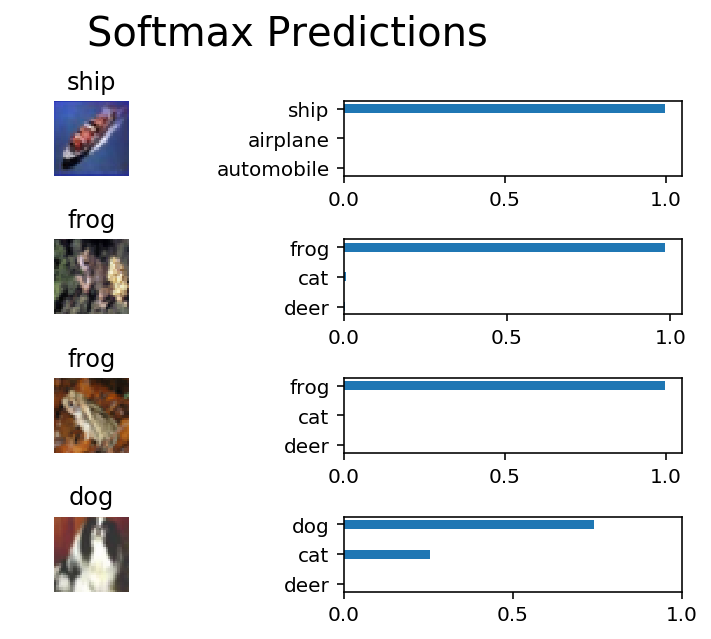

In [21]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

if useBN:
    save_model_path = './image_classification'
else:
    save_model_path = './image_classification_nobn'
    
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_test.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_phase_train = loaded_graph.get_tensor_by_name('phase_train:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0, loaded_phase_train:False})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0, loaded_phase_train:False})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()

## Why 50-80% Accuracy?
You might be wondering why you can't get an accuracy any higher. First things first, 50% isn't bad for a simple CNN.  Pure guessing would get you 10% accuracy. However, you might notice people are getting scores [well above 80%](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d3130).  That's because we haven't taught you all there is to know about neural networks. We still need to cover a few more techniques.
## Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook.  Save the notebook file as "dlnd_image_classification.ipynb" and save it as a HTML file under "File" -> "Download as".  Include the "helper.py" and "problem_unittests.py" files in your submission.